# A Cando Demo - mini-Sleb design
We are going to begin to explore and design mini-Sleb mimics - macromolecules that can selectively bind and hydrolyze tetrasaccharides.

## To replay the calculations in this notebook:

Click on this text box and then hit Shift-Enter to evaluate each cell.

Some cells take a few seconds to minutes to evaluate - wait until output appears before moving on to the next cell.

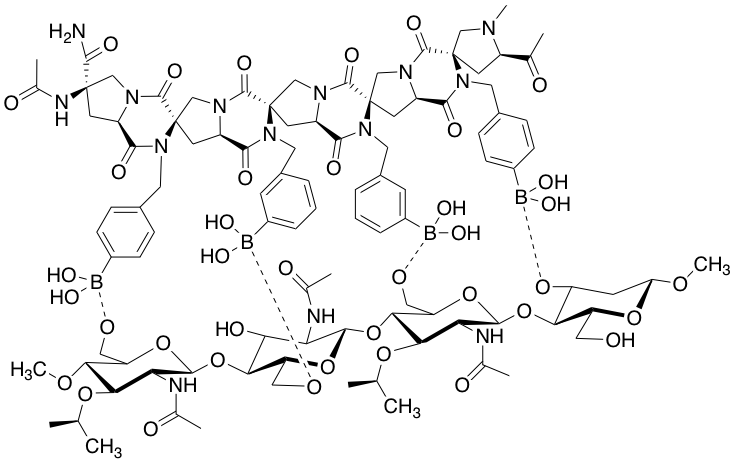

In [1]:
(cl-jupyter-user:png-from-file "data/sleb/half-sleb.png")

#### You can look at the structure and manipulate it using your mouse.

Rotate the molecule by dragging the left mouse button (or trackpad) within the view below.

Zoom (two button drag scroll or scroll wheel).

Pick atoms (hover over an atom and left button click).

At the bottom right corner of the view above is a very small control, drag that to make the view larger or smaller.

Double click with left button to go full screen, hit Escape to return to browser.

## Load and build 3D coordinates of trimer

In [1]:
(:= *agg* (load-chem-draw-aggregate "data/sleb/half-sleb.cdxml"))

*AGG*

In [4]:
(build-hydrogens *agg*)

NIL

In [6]:
(show *agg*)

A Jupyter Widget

The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [7]:
(:= *stereocenters* (stereocenters-sorted-by-name *agg*))

*STEREOCENTERS*

In [8]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_1960 S
C_1961 S
C_1962 S
C_1978 S
C_1979 S
C_2157 S
C_2158 S
C_2159 S
C_2175 S
C_2176 S
C_2182 S
C_2183 S
C_2184 S
C_2200 S
C_303  S
C_305  S
C_313  S
C_315  S
C_323  S
C_325  S
C_333  S
C_335  S
C_343  S
C_345  S
C_812  S
C_813  S
C_814  S
C_815  S
C_816  S
29 stereocenters set


NIL

We randomly displace all atoms to assist the energy minimization that we are about to do below.

In [9]:
(jostle *agg* 20)

NIL

In [10]:
(show *agg*)

A Jupyter Widget

In the view above, atoms are randomly jostled in space to break them out of "flatland".

## Below we construct a chemically reasonable structure of the molecule by minimizing the conformation energy. 

This does a lot of things in sequence:

1) Cando automatically assigns atom types.

2) Cando assigns Generalized Amber Force Field (GAFF) parameters.

3) Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

In [14]:
(ext:getenv "AMBERHOME")

"/Users/meister/Development/amber16"

In [13]:
(easy-gaff)

An error occurred of type: TYPE-ERROR: 
  NIL is not of type (OR STRING PATHNAME STREAM).

serious-condition backtrace:
0: (UNIVERSAL-ERROR-HANDLER NIL TYPE-ERROR (:DATUM NIL :EXPECTED-TYPE
                                            (OR STRING PATHNAME STREAM)))
1: (ERROR TYPE-ERROR :DATUM NIL :EXPECTED-TYPE (OR STRING PATHNAME STREAM))
2: (OPEN NIL)
3: (LOAD-ATOM-TYPE-RULES "ATOMTYPE_GFF.DEF")
4: (EASY-GAFF)
5: (APPLY EASY-GAFF NIL)
6: ((METHOD CCLASP-EVAL-WITH-ENV (T T)) (EASY-GAFF) NIL)
7 CCLASP-EVAL-WITH-ENV
8: (CCLASP-EVAL (EASY-GAFF) NIL)
9: (LAMBDA ((EASY-GAFF)))
10: ((METHOD CCLASP-EVAL-WITH-ENV (T T)) (PROGN (EASY-GAFF)) NIL)
11 CCLASP-EVAL-WITH-ENV
12: (CCLASP-EVAL (PROGN (EASY-GAFF)) NIL)
13: (EVAL (PROGN (EASY-GAFF)))
14: (LAMBDA)
15: (CALL-WITH-VARIABLE-BOUND *** #<NGLV:NGLWIDGET> #<FUNCTION LAMBDA>)
16: (LAMBDA)
17: (CALL-WITH-VARIABLE-BOUND ** NIL #<FUNCTION LAMBDA>)
18: (LAMBDA)
19: (CALL-WITH-VARIABLE-BOUND * NIL #<FUNCTION LAMBDA>)
20: (LAMBDA)
21: (CALL-WITH-VARIABL

NIL

#### You can ignore the warnings above.

In [10]:
(energy:minimize *agg* :force-field energy::*ff* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          20227.537
 minSDnP       0     2  0.000128   0.0       27980301.433          10308.850
 minSDnP       0     3  0.000289   0.0       15493536.195           6775.483
 minSDnP       0     4  0.000182   0.0       13029724.463           5294.411
DONE absolute force test:
forceRmsMag(4071.586903).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     5  0.000000   0.0              0.000           4071.587
 minCGnP       0     6  0.000217  50.5       10510311.408           4935.143
 minCGnP       0     7  0.000078  30.3       10042920.425           3382.872
 minCGnP       0     8  0.000164  73.8        9188388.565          10234.071
 minCGnP       0     9  0.000012  42.5        8839754.522           3977.367
 minCGnP       0    10  0.000164  46.0        8262086.268 

SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2


NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [11]:
(calculate-all-stereochemistry *stereocenters*)

Center: #<ATOM :C_1960/:C>  config: S
Center: #<ATOM :C_1961/:C>  config: S
Center: #<ATOM :C_1962/:C>  config: S
Center: #<ATOM :C_1978/:C>  config: S
Center: #<ATOM :C_1979/:C>  config: S
Center: #<ATOM :C_2157/:C>  config: S
Center: #<ATOM :C_2158/:C>  config: S
Center: #<ATOM :C_2159/:C>  config: S
Center: #<ATOM :C_2175/:C>  config: S
Center: #<ATOM :C_2176/:C>  config: S
Center: #<ATOM :C_2182/:C>  config: S
Center: #<ATOM :C_2183/:C>  config: S
Center: #<ATOM :C_2184/:C>  config: S
Center: #<ATOM :C_2200/:C>  config: S
Center: #<ATOM :C_303/:C>  config: S
Center: #<ATOM :C_305/:C>  config: S
Center: #<ATOM :C_313/:C>  config: S
Center: #<ATOM :C_315/:C>  config: S
Center: #<ATOM :C_323/:C>  config: S
Center: #<ATOM :C_325/:C>  config: S
Center: #<ATOM :C_333/:C>  config: S
Center: #<ATOM :C_335/:C>  config: S
Center: #<ATOM :C_343/:C>  config: S
Center: #<ATOM :C_345/:C>  config: S
Center: #<ATOM :C_812/:C>  config: S
Center: #<ATOM :C_813/:C>  config: S
Center: #<ATOM :C_814/:C

NIL

In [12]:
(nglv:show-aggregate *agg*)

A Jupyter Widget